Please submit an electronic version of your Python Jupyter notebook on NYU Brightspace. Remember that this assignment is to be done individually. Solutions will be posted a few days after the due date (on Feb 20th), so assignments submitted until that day will receive a late penalty, but no late assignments will be accepted after the solutions are posted.

Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10%)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3%)

The real-world prediction problem: 

Predicting the danger of urban floods based on many urban data inputs is a real-world urban prediction issue where interpretability is critical. The consequences of this issue for public safety, emergency management, and urban planning make it a very important one. The model has the ability to forecast flood risk in various metropolitan locations by taking into account several aspects, including but not limited to rainfall intensity, drainage capacity, land use, topography, and infrastructure quality.

Why Interpretability is Essential:

•	Stakeholder Communication: Stakeholders in disaster management and urban planning must comprehend the results fully. Because these stakeholders might not have a technical background, decision-making procedures depend on the ability to justify forecasts.

•	Policy Development and Implementation: Policies targeted at reducing these risks can be developed with guidance from an understanding of the elements that contribute most substantially to flood risk. Urban planners might concentrate their efforts on improving certain areas, such drainage capacity difficulties or specific land uses, if the model identifies these as the main risk factors.

•	Public Trust and Compliance: The public's awareness of the risk may have an impact on their compliance with evacuation orders and other emergency protocols. Authorities may increase public trust and cooperation if they can provide the rationale behind their forecasts and alerts.


Why it might be preferable to use decision trees rather than random forests:
    
•	Simplicity and Visual Interpretability: Compared to random forests, which are made up of many trees, decision trees are far simpler to perceive and understand. It is simpler for non-technical stakeholders to comprehend the model's predictions when a single decision tree is used to explain how decisions are made at each node depending on the input attributes.

•	Feature Importance: The interpretability of a single decision tree in terms of how certain features impact the prediction at each node is more straightforward, even if random forests can also shed light on feature relevance. This is especially helpful in situations when stakeholders must comprehend how several variables directly affect the result.


b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3%)

The real-world prediction problem: 

Predicting crime hotspots based on several urban data inputs is a real-world urban prediction issue where accuracy dominates interpretability. For law enforcement and public safety organizations hoping to effectively deploy resources, put preventative measures in place, and eventually lower crime rates, this issue is critical. Based on variables like the following, the model could forecast the frequency of crimes in various urban areas: Historical crime data,
Socioeconomic indicators, Environmental design, and Density of population.


Why Interpretability is Essential:

•	Resource Allocation: The resources of law enforcement organizations are few. They may focus patrols, surveillance, and community engagement activities on the regions with the greatest projected crime rates when they make accurate projections.


•	Preventive Measures: Highly accurate identification of possible crime hotspots enables the implementation of focused preventative measures that might discourage criminal activity, including adding security cameras or upgrading public lighting.

•	Public Safety: Reliability in crime prediction may be used to alert companies and citizens in high-risk locations, improving public safety in general.

Why it might be preferable to use use random forests rather than decision trees:
    
•	Higher Accuracy: Random forests use ensemble learning, in which several decision trees vote on the result, to increase prediction accuracy. Predictions made using this procedure are more accurate than those made using a single decision tree, which may overfit or underfit the data. It also minimizes volatility and bias.

•	Robustness to Noise: Data on urban crime may be complicated, noisy, and full of interrelated factors. Compared to a single decision tree, random forests can manage complicated interactions between predictors and are more resilient to overfitting in the face of noise.

•	Feature Importance: In this case, interpretability is less crucial, but random forests can still offer insightful information on the characteristics that matter most for identifying crime hotspots. Even if the individual decision routes in a forest are not as apparent as they are in a single decision tree, this knowledge may still be used to drive policy creation and strategic planning.

•	Generalization: When it comes to fresh and unexplored data, random forests tend to generalize better than single decision trees. This feature is critical for crime prediction since trends in crime data might change over time and the model must be able to update or retrain itself to fit new data without becoming too complex.


c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4%)

Model Distillation into Interpretable Models


Model distillation is a technique where knowledge from a complex, potentially opaque model, is transferred to a simpler, more interpretable model. The idea is to train the simpler model to approximate the predictions of the complex model as closely as possible. While Pedro Domingos has discussed various methods for combining models for improved prediction, model distillation focuses on interpretability:

Distillation Process: Use the probabilities and classifications that the Random Forest predicts after training it as labels to train a more basic model. A single decision tree, a logistic regression model, or any other model with better interpretability might be this more straightforward model.

Interpretability with Accuracy: Though it won't be as accurate as the Random Forest, the more straightforward model that was trained through distillation will reveal trends in decision-making and important characteristics. The goal is to translate the "spirit" of the Random Forest's forecasts into a more comprehensible format for people.





Feature Importance Analysis with Enhanced Visualizations


Random Forests inherently compute the importance of features based on how much they decrease the impurity in splits (Gini importance) or increase the model's accuracy (permutation importance). Enhancing this with visualizations can offer deeper insights:

Aggregate and Visualize Importance: In addition to enumerating feature importances, combine them according to thematic groupings (if relevant) to observe other regions influencing the model. In urban planning, for instance, organize characteristics according to socioeconomic and environmental considerations, etc.

Partial Dependence Plots (PDPs) and SHAP Values: Use these to visualize how changes in feature values influence the predictions of the Random Forest, offering insights into the relationship between features and the target variable. SHAP (SHapley Additive exPlanations) values, in particular, can provide a detailed decomposition of the prediction for an individual instance, attributing the contribution of each feature to the final prediction. (cited from CHATGPT)

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been modified, so you may get a different tree than the one shown in the lecture notes.  (30%)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2%)

In [3]:
# your code here

In [4]:
common_MPG=df[['MPG','cylinders']].groupby('MPG').count()
common_MPG[['count']]=common_MPG[['cylinders']]
common_MPG=common_MPG.drop(columns=['cylinders'])
common_MPG

,count
MPG,
bad,14
good,6


In [5]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%)

In [6]:
# your code here

In [7]:
def compute(split,df):
    Y=df.loc[split]
    goodY = Y.loc[Y['MPG'] == 'good'].shape[0]
    badY = Y.loc[Y['MPG'] == 'bad'].shape[0]
    goodN = 6 - goodY
    badN = 14 - badY
    return (goodY,badY,goodN,badN)
    

In [8]:
#For "cylinders" column
split = (df['cylinders'] == 4)
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.4680577739061723

In [9]:
split = (df['cylinders'] == 6)
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.1916312040067166

In [10]:
split = (df['cylinders'] == 8)
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.15307795338969116

In [11]:
#For "weight" column
split = (df['weight'] == 'light')
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.1916312040067166

In [12]:
split = (df['weight'] == 'medium')
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.0058021490143458365

In [13]:
split = (df['weight'] == 'weighty')
goodY,badY,goodN,badN = compute(split,df)
InformationGain(goodY,badY,goodN,badN)

0.1916312040067166

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5%) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [14]:
# your code here

In [15]:
df_sorted = df.sort_values(by='HP').reset_index(drop=True)
midpoints = (df_sorted['HP'].shift(-1)+df_sorted['HP'])/2
midpoints = midpoints.dropna().tolist()

In [16]:
for a in midpoints:
    split = (df['HP'] <= a)
    goodY,badY,goodN,badN = compute(split,df)
    m = InformationGain(goodY,badY,goodN,badN)
    print('HP <=',a,'',m)

HP <= 70.0  0.09139023062144994
HP <= 78.0  0.19350684337293433
HP <= 83.0  0.30984030471640045
HP <= 87.0  0.16206546623874934
HP <= 89.5  0.2759267455941731
HP <= 91.0  0.1916312040067166
HP <= 92.5  0.3248903838733558
HP <= 93.5  0.5567796494470395
HP <= 94.5  0.4680577739061723
HP <= 95.0  0.28129089923069267
HP <= 95.0  0.28129089923069267
HP <= 97.5  0.28129089923069267
HP <= 100.0  0.1916312040067166
HP <= 105.0  0.1916312040067166
HP <= 124.5  0.15307795338969116
HP <= 142.0  0.1177436968907207
HP <= 157.5  0.08512362463476446
HP <= 172.5  0.054824648581652015
HP <= 182.5  0.026534328467343292


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4%)

Your answer here.

In [17]:
#The ideal binary split for the data is HP <= 93.5.

In [18]:
#Further partitioning would be necessary for the Yes node that this split produced.

In [19]:
split = (df['HP'] <= 93.5)
goodY,badY,goodN,badN = compute(split,df)

In [20]:
goodY,badY,goodN,badN

(6, 2, 0, 12)

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6%)

In [21]:
# your code here

In [22]:
df1 = df.loc[split]

In [23]:
common_MPG1 = df1[['MPG','cylinders']].groupby('MPG').count()
common_MPG1[['count']] = common_MPG1[['cylinders']]
common_MPG1 = common_MPG1.drop(columns=['cylinders'])

In [24]:
common_MPG1

,count
MPG,
bad,2
good,6


In [25]:
def compute(split,df):
    Y = df.loc[split]
    goodY = Y.loc[Y['MPG'] == 'good'].shape[0]
    badY = Y.loc[Y['MPG'] == 'bad'].shape[0]
    goodN = 6 - goodY
    badN = 2 - badY
    return (goodY,badY,goodN,badN)

In [26]:
split = (df1['cylinders'] == 4)
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.8112781244591328


In [27]:
split = (df1['cylinders'] == 6)
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.8112781244591328


In [28]:
split = (df1['cylinders'] == 8)
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.0


In [29]:
split = (df1['weight'] == 'light')
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.31127812445913283


In [30]:
split = (df1['weight'] == 'medium')
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.31127812445913283


In [31]:
split = (df1['weight'] == 'weihty')
goodY,badY,goodN,badN = compute(split,df1)
print(InformationGain(goodY,badY,goodN,badN))

0.0


In [32]:
df_sorted = df1.sort_values(by='HP').reset_index(drop=True)
midpoints = (df_sorted['HP'].shift(-1) + df_sorted['HP'])/2
midpoints = midpoints.dropna().tolist()

In [33]:
for a in midpoints:
    split = (df['HP'] <= a)
    goodY,badY,goodN,badN = compute(split,df)
    m = InformationGain(goodY,badY,goodN,badN)
    print('HP <=',a,'',m)

HP <= 70.0  0.056047626963330766
HP <= 78.0  0.12255624891826578
HP <= 83.0  0.20443400292496483
HP <= 87.0  0.0
HP <= 89.5  0.015712127384097885
HP <= 91.0  0.12255624891826578
HP <= 92.5  0.056047626963330766


In [34]:
split = (df1['cylinders'] == 4)
goodY,badY,goodN,badN = compute(split,df1)
goodY,badY,goodN,badN

(6, 0, 0, 2)

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4%)

Your answer here

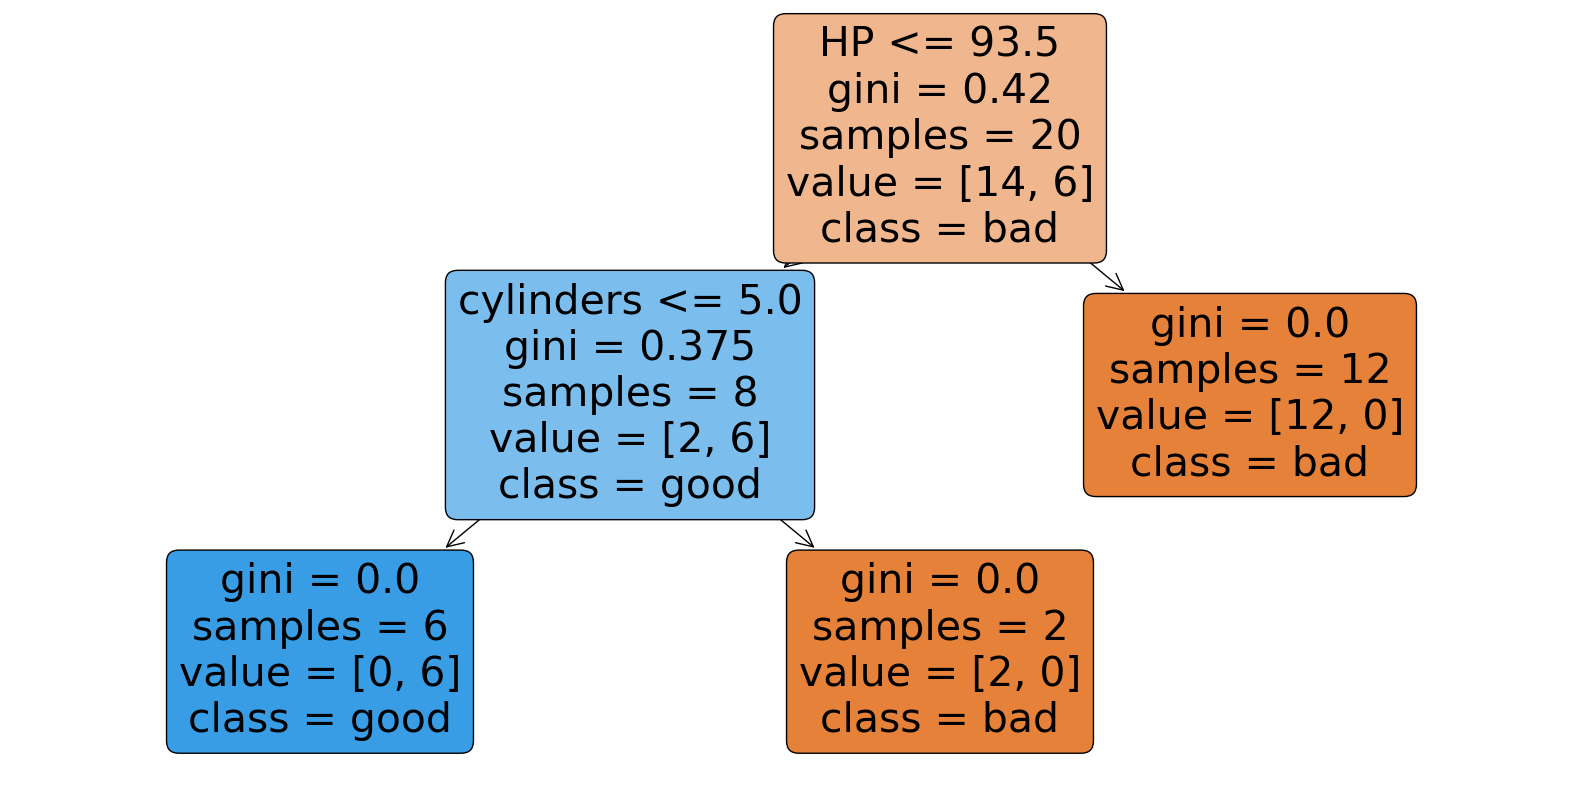

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

# Simulating the original dataset loading
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\ngood,4,93,light')
df = pd.read_csv(thefile)

# Preparing the data
X = pd.get_dummies(df.drop('MPG', axis=1))  # Convert categorical variables to dummy variables
y = df['MPG'].map({'good': 1, 'bad': 0})  # Converting the target to a binary format

# Training the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(max_depth=3)  # Example max_depth to simplify visualization
decision_tree_model.fit(X, y)

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))  # Set the figure size for better readability
plot_tree(decision_tree_model, 
          filled=True, 
          rounded=True, 
          class_names=['bad', 'good'],  # Assuming binary classification with 'bad' and 'good'
          feature_names=list(X.columns))  # Convert feature names from Index to list
plt.show()

In [36]:
# cited from CHATGPT

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4%)

MPG,cylinders,HP,weight

???,4,93,light

???,6,113,medium

???,4,83,weighty

???,6,70,weighty


In [37]:
import io
decision = io.StringIO('MPG,cylinders,HP,weight\ngood,4,93,light\nbad,6,113,medium\ngood,4,83,weighty\nbad,6,70,weighty')
decision = pd.read_csv(decision)
decision

,MPG,cylinders,HP,weight
0,good,4,93,light
1,bad,6,113,medium
2,good,4,83,weighty
3,bad,6,70,weighty


### Question 3, Predicting burden of disease （40%)

In [38]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10%)

In [39]:
# your code here

In [40]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [41]:
# Preprocess the Data


#Removes rows with missing values (NaNs) 
data = data.dropna()

X = data.iloc[:,1:-1]

# Converts categorical variables within X into dummy/indicator variables
X = pd.get_dummies(X)
y = data.BurdenOfDisease


In [42]:
# Split the Data into Training and Testing Sets
# 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=999)

In [43]:
# Train Decision Tree Classifiers with Varying Depths and Evaluate Their Performance

scores = []
for n in range(1,20):
    dt = DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train,y_train)
    score = dt.score(X_test, y_test)
    # Append the depth and score to the list
    scores.append([n,score])

    
# Create a DataFrame from the Scores
scores_df = pd.DataFrame(scores, columns = ['Depth','Score'])


In [44]:
print(scores_df)

    Depth     Score
0       1  0.333333
1       2  0.615385
2       3  0.641026
3       4  0.666667
4       5  0.666667
5       6  0.666667
6       7  0.641026
7       8  0.666667
8       9  0.666667
9      10  0.615385
10     11  0.641026
11     12  0.615385
12     13  0.666667
13     14  0.666667
14     15  0.666667
15     16  0.641026
16     17  0.666667
17     18  0.666667
18     19  0.641026


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10%)

In [45]:
# your code here

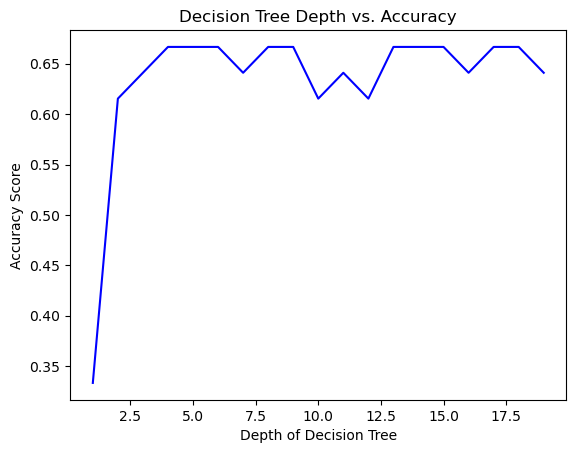

In [46]:
plt.plot(scores_df.Depth, scores_df.Score, color='blue')
plt.xlabel('Depth of Decision Tree')  
plt.ylabel('Accuracy Score')  
plt.title('Decision Tree Depth vs. Accuracy')
plt.show()  # To display the plot

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10%)

In [47]:
# your code here

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(rs.score(X_test, y_test))

DecisionTreeClassifier(max_depth=10)
0.6410256410256411


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10%)

In [50]:
# your code here

In [51]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=["low", "medium", "high", "awful"],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 91, value = [17, 25, 26, 23], class = high", fillcolor="#fcfeff"] ;
1 [label="GDPPCptaIntDol <= 1094.0, samples = 48, value = [17, 22, 1, 8], class = medium", fillcolor="#e1fbdf"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 9, value = [9, 0, 0, 0], class = low", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="samples = 39, value = [8, 22, 1, 8], class = medium", fillcolor="#acf3a6"] ;
1 -> 3 ;
4 [label="SustAccImprSanUrb <= 0.842, samples = 43, value = [0, 3, 25, 15], class = high", fillcolor="#b8dcf6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 12, value = [0, 2, 1, 9], class = awful", fillcolor="#e374ed"] ;
4 -> 5 ;
6 [label="samples = 31, value = [0, 1, 24, 6], class = high", fillcolor="#70b8ec"] ;
4 -> 6 ;
}


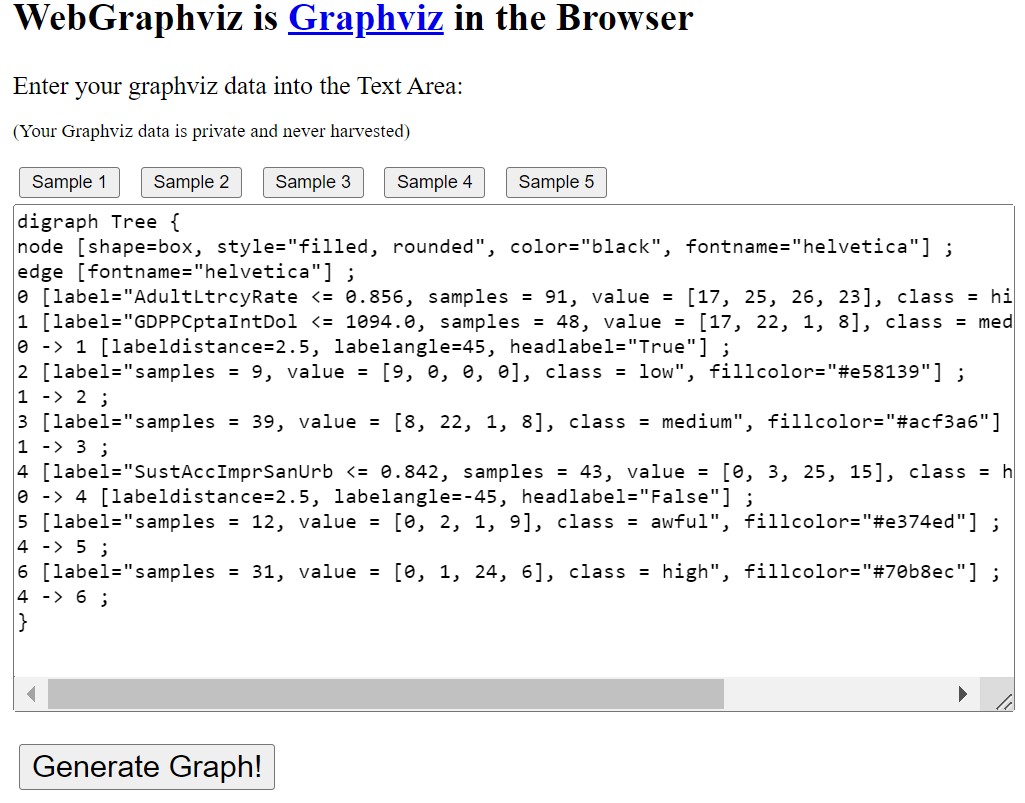

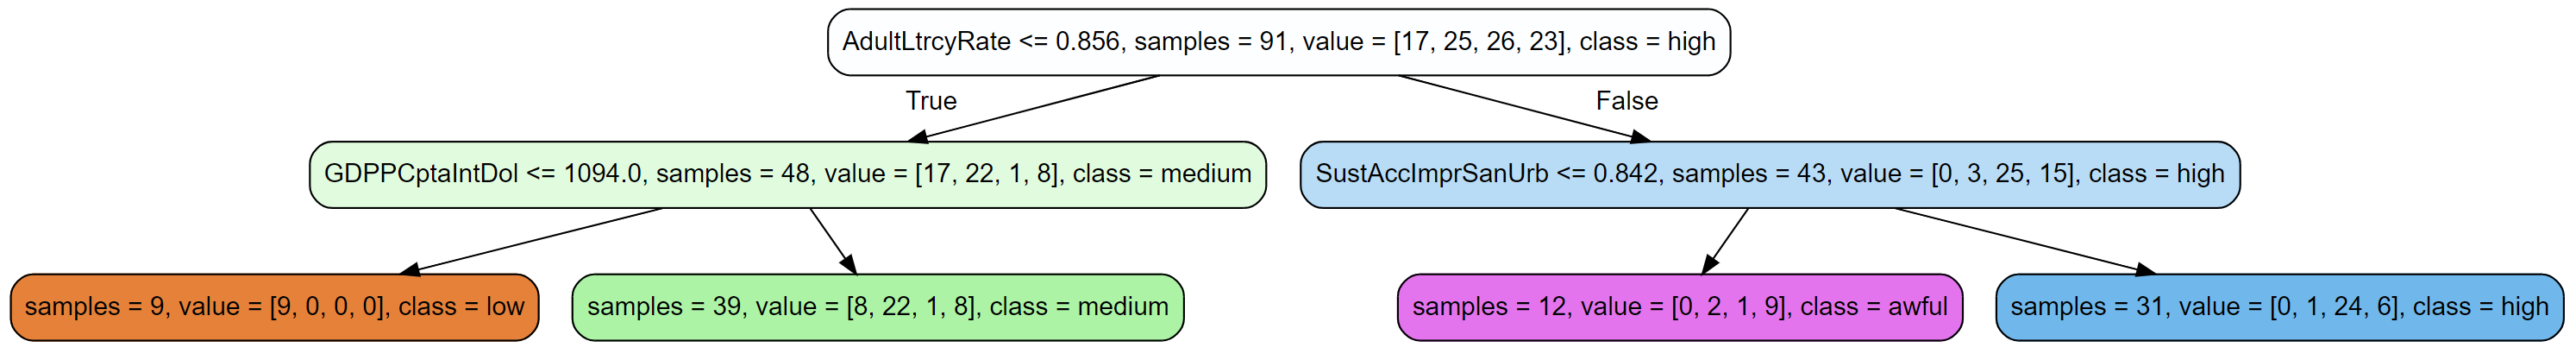

### Question 4, Fit a random forest to the data from question 3 (20%)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10%)

In [52]:
# your code here

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
print(rf.score(X_test,y_test))

0.6666666666666666


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10%)

The Random Forest model boasts superior accuracy. As an ensemble approach, it aggregates predictions from numerous decision trees to surpass the predictive accuracy of any single tree. This method excels with complex datasets by mitigating overfitting through the collective averaging of numerous trees' outcomes. Yet, this boost in accuracy compromises the model's ease of interpretation; the inherent complexity and the amalgamation of multiple trees' results render the Random Forest model more challenging to visualize and comprehend.

Conversely, the Decision Tree model offers an intuitive visual representation of its decision-making pathway, initiating at the root node with the 'Gini coefficient' as a feature. Each subsequent node denotes a decision point based on a feature threshold, branching off into pathways leading to varied outcomes, culminating in leaf nodes that signify the final decision or predicted class. This model's strength lies in its interpretability, echoing the human decision-making process, making it accessible and comprehensible even to those with minimal machine learning knowledge. However, its susceptibility to overfitting, particularly as the tree depth increases, might diminish its effectiveness on new, unseen data when compared to ensemble techniques like the Random Forest.

To encapsulate, while the Random Forest model is lauded for its accuracy, it trades off simplicity for complexity. The Decision Tree, in contrast, may not reach the same accuracy heights but is prized for its straightforwardness and ease of understanding. The selection between these two models typically hinges on the specific needs of the application at hand, with Random Forests being favored for their performance and Decision Trees for their simplicity and clarity.